# Decision Trees and Random Forests

In [1]:
# Import necessary libraries
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

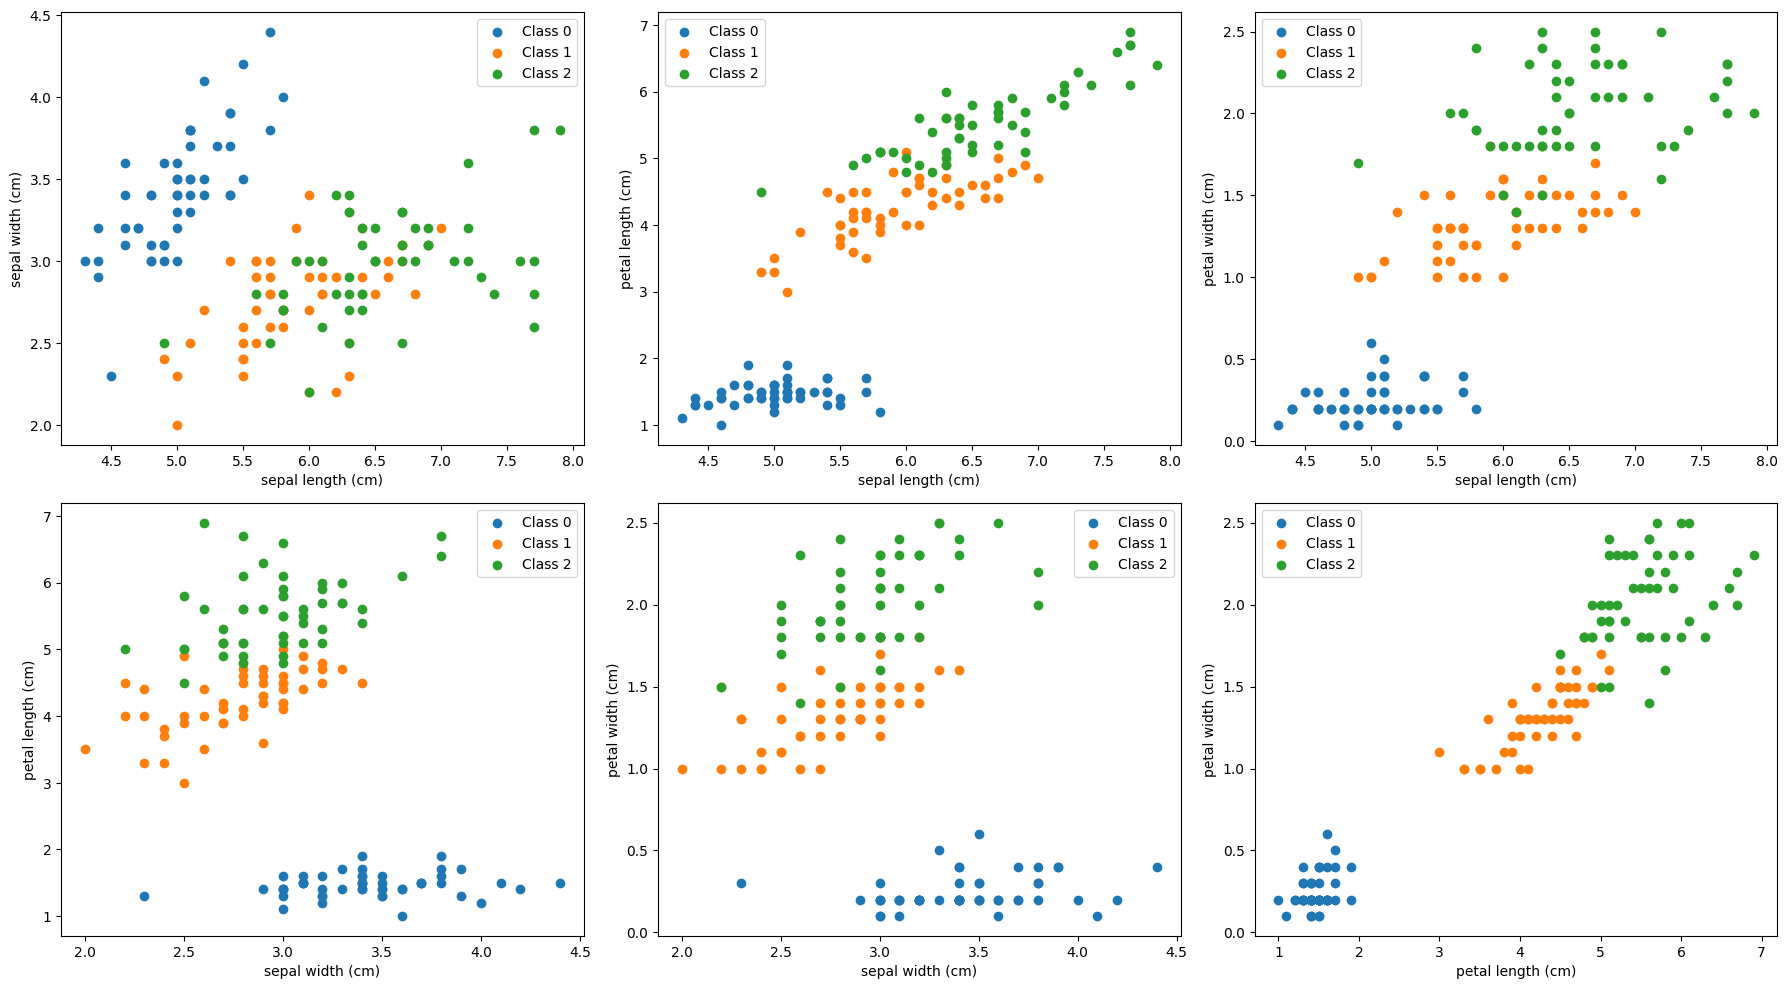

In [3]:
# Plot all possible combinations of two features
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

combs = list(combinations(range(4), 2))

for i, comb in enumerate(combs):
    ax = axs[i // 3, i % 3]
    x_feat, y_feat = comb
    for target in np.unique(y):
        ax.scatter(X[y == target, x_feat], X[y == target, y_feat], label=f"Class {target}")
    ax.set_xlabel(feature_names[x_feat])
    ax.set_ylabel(feature_names[y_feat])
    ax.legend()

plt.tight_layout()
plt.show()

In [4]:
# Decision Tree Classifier with RandomizedSearchCV
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}
dt_clf = DecisionTreeClassifier(random_state=42)
dt_rs_clf = RandomizedSearchCV(dt_clf, dt_params, n_iter=10, cv=5, random_state=42, verbose=1, n_jobs=-1)
dt_rs_clf.fit(X_train, y_train)
dt_best_clf = dt_rs_clf.best_estimator_

# Random Forest Classifier with RandomizedSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_clf = RandomForestClassifier(random_state=42)
rf_rs_clf = RandomizedSearchCV(rf_clf, rf_params, n_iter=10, cv=5, random_state=42, verbose=1, n_jobs=-1)
rf_rs_clf.fit(X_train, y_train)
rf_best_clf = rf_rs_clf.best_estimator_

# Print best parameters and scores
print("\nBest parameters for Decision Tree Classifier:", dt_rs_clf.best_params_)
print("Best score for Decision Tree Classifier:", dt_rs_clf.best_score_)
print("\nBest parameters for Random Forest Classifier:", rf_rs_clf.best_params_)
print("Best score for Random Forest Classifier:", rf_rs_clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters for Decision Tree Classifier: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_depth': 5, 'criterion': 'gini'}
Best score for Decision Tree Classifier: 0.95

Best parameters for Random Forest Classifier: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}
Best score for Random Forest Classifier: 0.95


In [5]:
# Test performance of the best classifiers
dt_score = dt_best_clf.score(X_test, y_test)
rf_score = rf_best_clf.score(X_test, y_test)
print(f"\nTest score for Decision Tree Classifier: {dt_score:.2f}")
print(f"Test score for Random Forest Classifier: {rf_score:.2f}")


Test score for Decision Tree Classifier: 1.00
Test score for Random Forest Classifier: 1.00


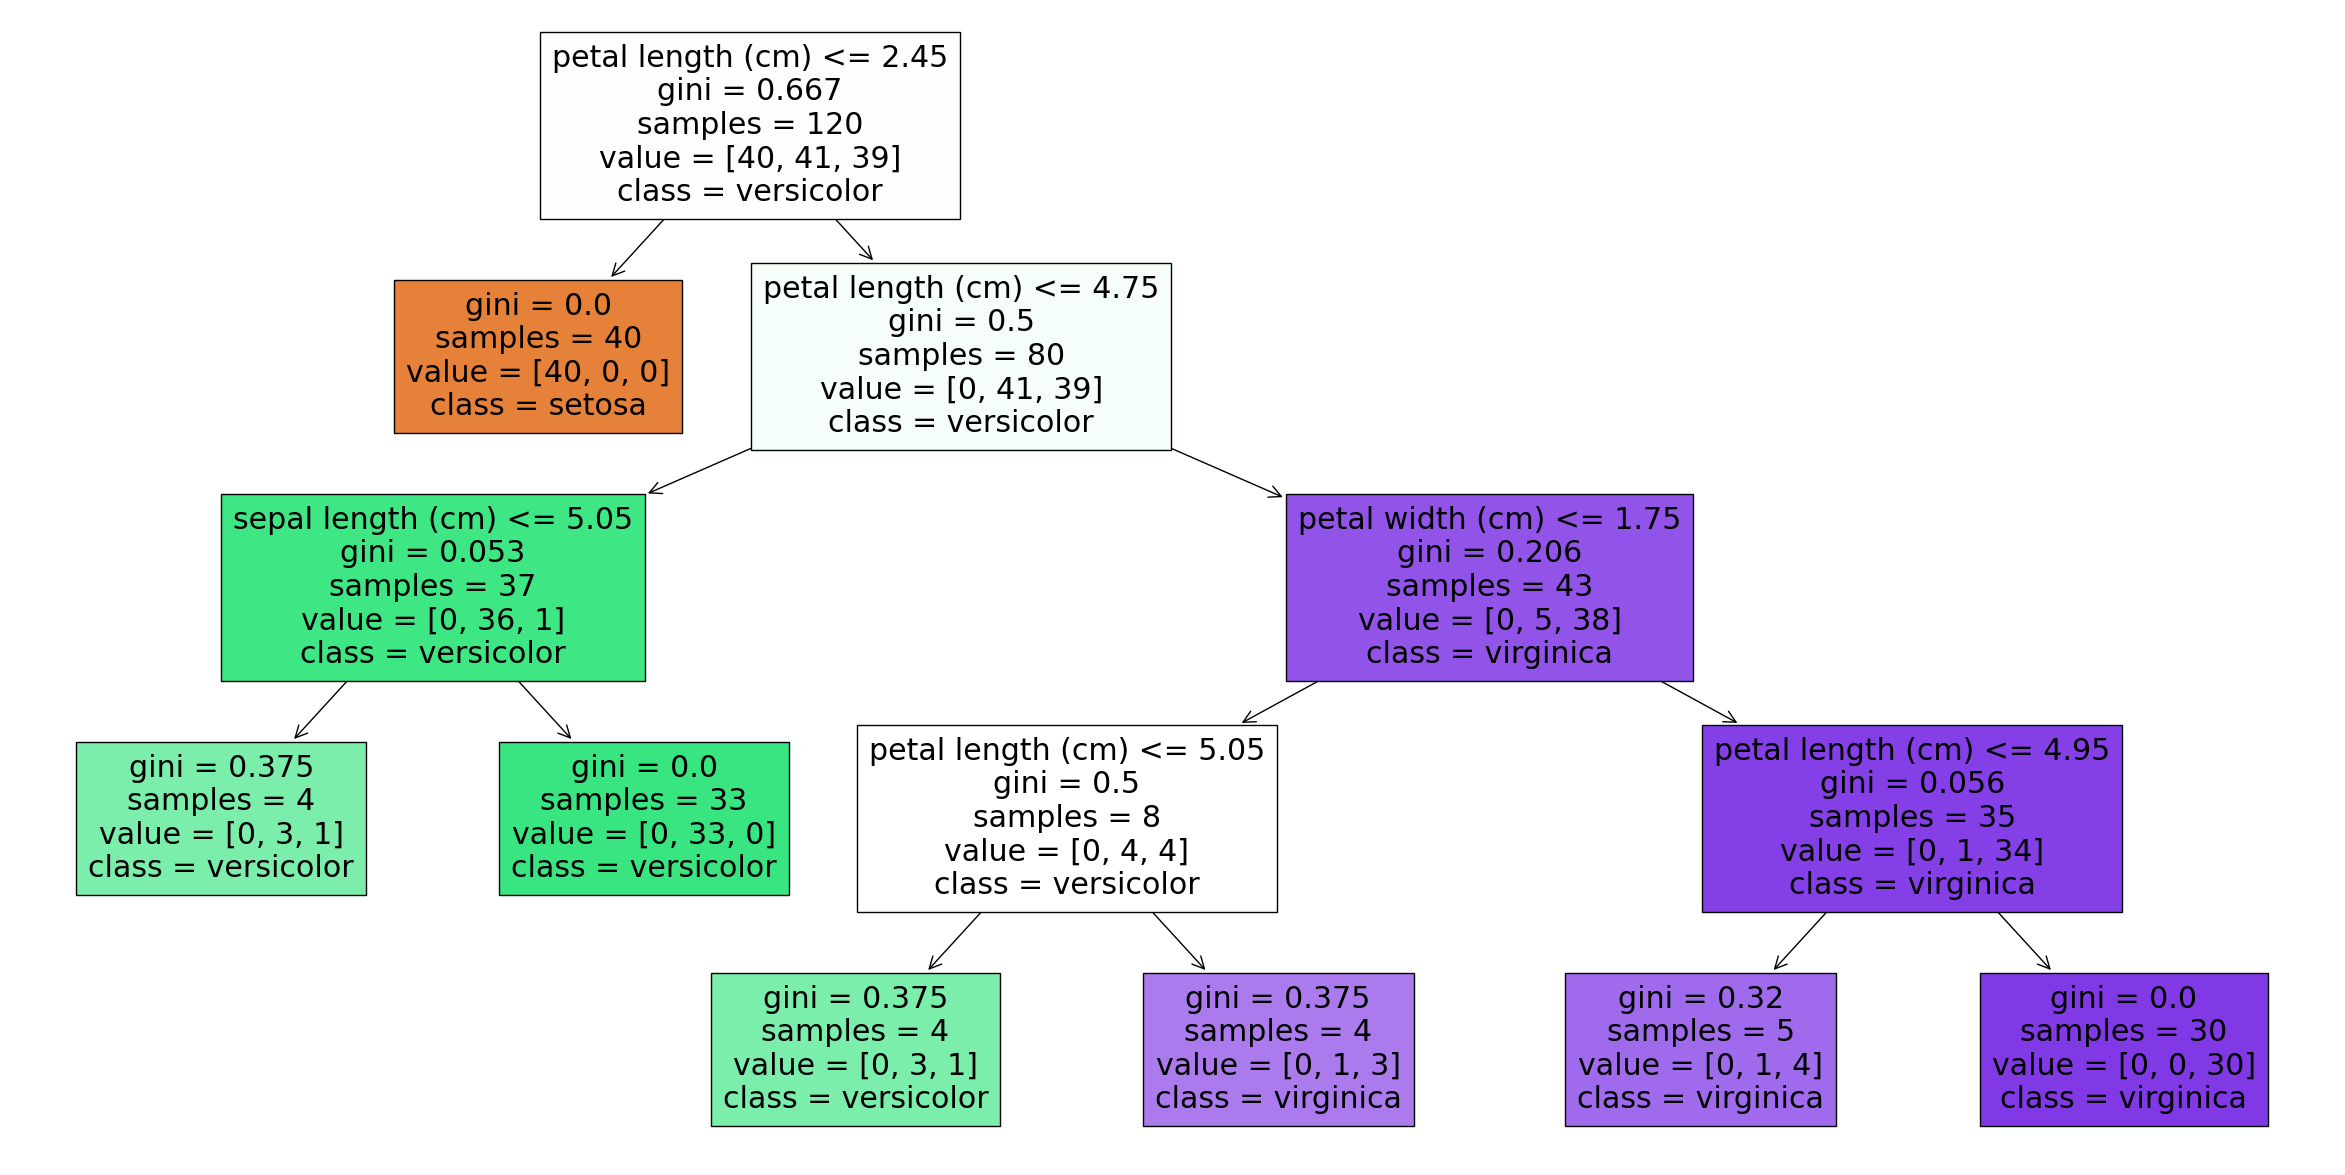

In [6]:
# Plot the decision tree
plt.figure(figsize=(30, 15))
plot_tree(dt_best_clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

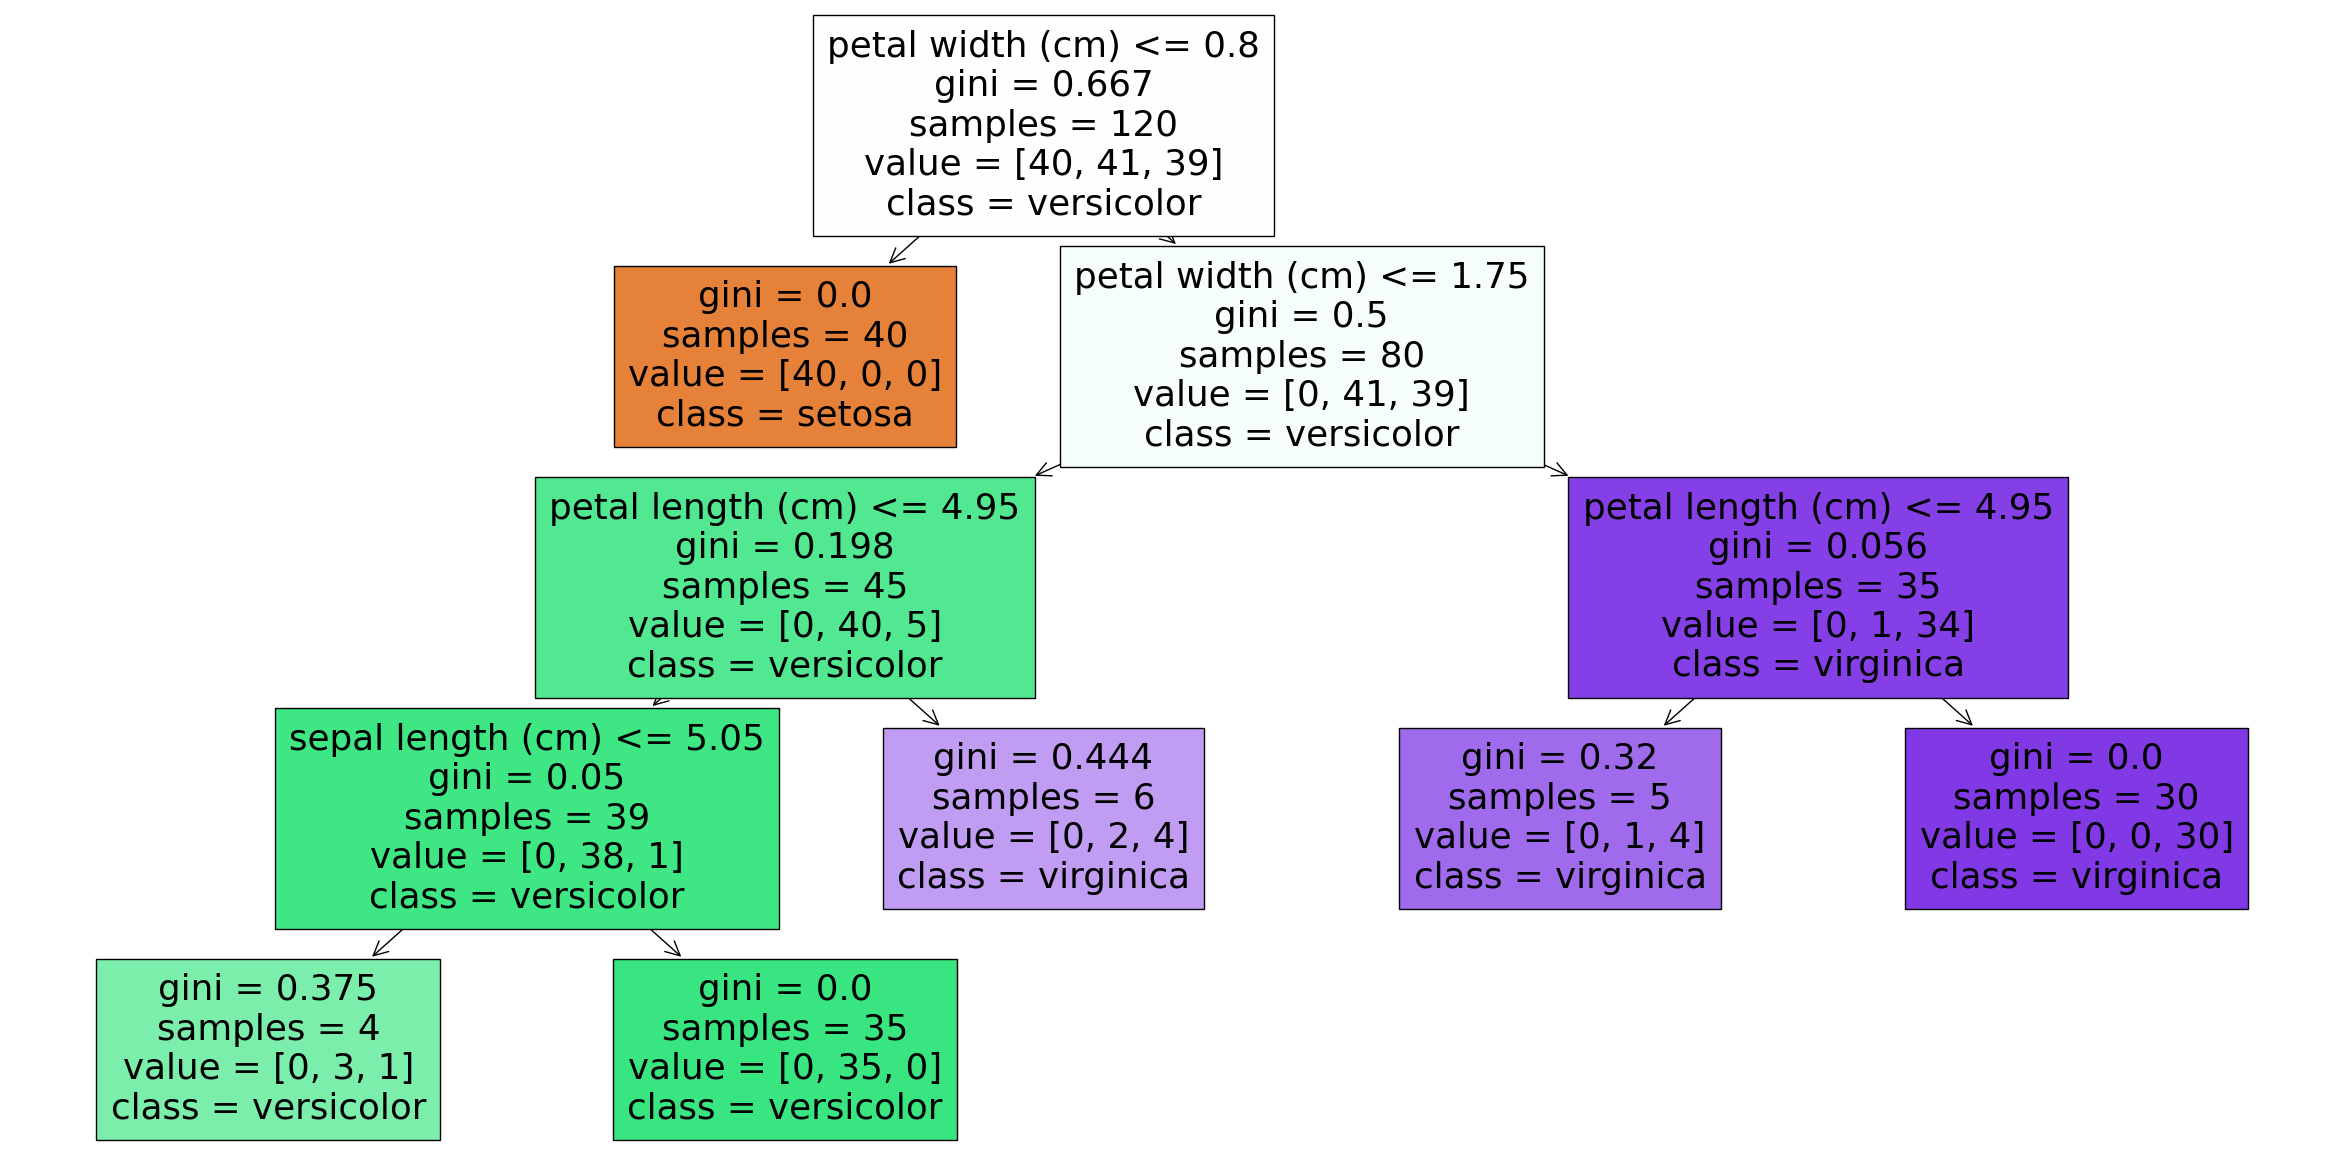

In [7]:
# Plot the decision tree
plt.figure(figsize=(30, 15))
plot_tree(rf_best_clf.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True)
plt.show()